In [1]:
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
from testCases import *
import matplotlib.pyplot as plt
from planar_utils import plot_decision_boundary, sigmoid,load_planar_dataset,load_extra_datasets

In [2]:
# 随机数种子
np.random.seed(1)

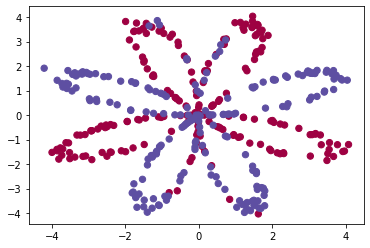

In [3]:
X,Y = load_planar_dataset()
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral)

In [32]:
X.shape,Y.shape

((2, 400), (1, 400))

In [43]:
# 定义各层节点数量
n_x = X.shape[0]
n_h = 4
n_y = Y.shape[0]

In [44]:
def init_params(n_x,n_h,n_y):
    """初始化网络参数"""
    np.random.seed(2)
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    params = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    
    return params

In [45]:
def forward_prop(X,params):
    """前向传播"""
    W1,b1,W2,b2 = params["W1"],params["b1"],params["W2"],params["b2"]
    
    Z1 = W1 @ X + b1
    A1 = np.tanh(Z1)
    Z2 = W2 @ A1 + b2
    A2 = sigmoid(Z2)
    
    return Z1,A1,Z2,A2

In [46]:
def costFunction(A2,Y):
    """计算损失函数"""
    m = Y.shape[1]
    
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),(1 - Y))
    cost = - np.sum(logprobs) / m
    
    return cost

In [47]:
def back_prop(params,Z1,A1,Z2,A2,X,Y):
    """反向传播"""
    m = Y.shape[1]
    
    W1,b1,W2,b2 = params["W1"],params["b1"],params["W2"],params["b2"]
    
    dZ2 = A2 - Y
    dW2 = dZ2 @ A1.T / m
    db2 = np.sum(dZ2,axis=1,keepdims=True)
    
    dZ1 = np.multiply((W2.T @ dZ2),1 - np.power(A1,2))
    dW1 = dZ1 @ X.T / m
    db1 = np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {
        "dW1":dW1,
        "db1":db1,
        "dW2":dW2,
        "db2":db2
    }
    
    return grads

In [48]:
def update_params(params,grads,a):
    """参数更新"""
    W1,b1,W2,b2 = params["W1"],params["b1"],params["W2"],params["b2"]
    dW1,db1,dW2,db2 = grads["dW1"],grads["db1"],grads["dW2"],grads["db2"]
    
    W1 = W1 - a * dW1
    b1 = b1 - a * db1
    W2 = W2 - a * dW2
    b2 = b2 - a * db2
    
    params_new = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2  
    }
    
    return params_new

In [63]:
# 模型实现
np.random.seed(3)

params = init_params(n_x,n_h,n_y)
W1,b1,W2,b2 = params["W1"],params["b1"],params["W2"],params["b2"]

iters = 10000

for i in range(iters):
    Z1,A1,Z2,A2 = forward_prop(X,params)
    cost = costFunction(A2,Y)
    grads = back_prop(params,Z1,A1,Z2,A2,X,Y)
    params = update_params(params,grads,a=0.01)
    
    if i % 1000 == 0:
        print("迭代次数：%d，误差为：%f" % (i,cost))
        
        

迭代次数：0，误差为：0.693048
迭代次数：1000，误差为：0.688924
迭代次数：2000，误差为：0.676886
迭代次数：3000，误差为：0.668738
迭代次数：4000，误差为：0.649140
迭代次数：5000，误差为：0.628957
迭代次数：6000，误差为：0.616019
迭代次数：7000，误差为：0.604165
迭代次数：8000，误差为：0.548051
迭代次数：9000，误差为：0.481368


In [64]:
def predict(params,X):
    """预测"""
    Z1,A1,Z2,A2 = forward_prop(X,params)
    Y_pre = np.round(A2)
    
    return Y_pre

In [66]:
Y_pre = predict(params,X)
np.sum(Y_pre == Y) / Y.shape[1] # 计算准确率

0.845

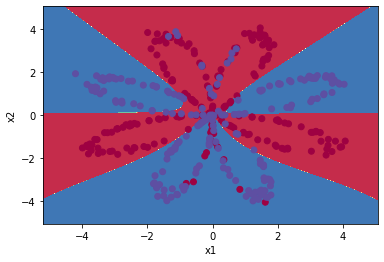

In [67]:
plot_decision_boundary(lambda x : predict(params,x.T),X,Y)